In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sdv.tabular import CTGAN,GaussianCopula,CopulaGAN,TVAE
import matplotlib.pyplot as plt
import seaborn as sns
import sdv

In [2]:
%matplotlib inline

In [3]:
#load UCI Adult Dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None,names=['age','workclass','fnlwgt','education','educationnum','maritalstatus',
                                                'occupation','relationship','race','sex','capitalgain','capitalloss','hoursperweek','nativecountry','target'])

In [4]:
df.head()

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
x_train,x_valid = train_test_split(df)

In [6]:
#start with a CTGAN
ctgan_model = CTGAN()
ctgan_model.fit(x_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init 

In [7]:
ctgan_model.sample(1000)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,target
0,58,Private,110336,11th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,-10,0,40,United-States,>50K
1,24,Private,370690,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Male,-7,0,40,United-States,<=50K
2,25,Self-emp-not-inc,172876,HS-grad,9,Divorced,Craft-repair,Unmarried,Black,Male,-11,0,39,United-States,<=50K
3,51,Local-gov,190272,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,14250,0,44,United-States,>50K
4,30,Private,112931,Some-college,9,Never-married,Adm-clerical,Other-relative,White,Male,-11,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Private,339297,Bachelors,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,2888,0,43,United-States,<=50K
996,37,Private,304772,Some-college,9,Married-civ-spouse,Machine-op-inspct,Unmarried,Asian-Pac-Islander,Male,-25,0,39,Columbia,<=50K
997,58,Self-emp-not-inc,164468,Bachelors,12,Married-civ-spouse,Farming-fishing,Husband,White,Male,14592,0,50,United-States,>50K
998,35,Local-gov,319808,HS-grad,8,Divorced,?,Not-in-family,White,Male,-29,0,39,United-States,<=50K


In [8]:
#listing our categorical and continuous variables for data preparation later
categorical = ['workclass','education','maritalstatus','occupation','relationship','race','sex','nativecountry']
continuous = ['age','fnlwgt','educationnum','capitalgain','capitalloss','hoursperweek']

age
fnlwgt
educationnum
capitalgain
capitalloss
hoursperweek


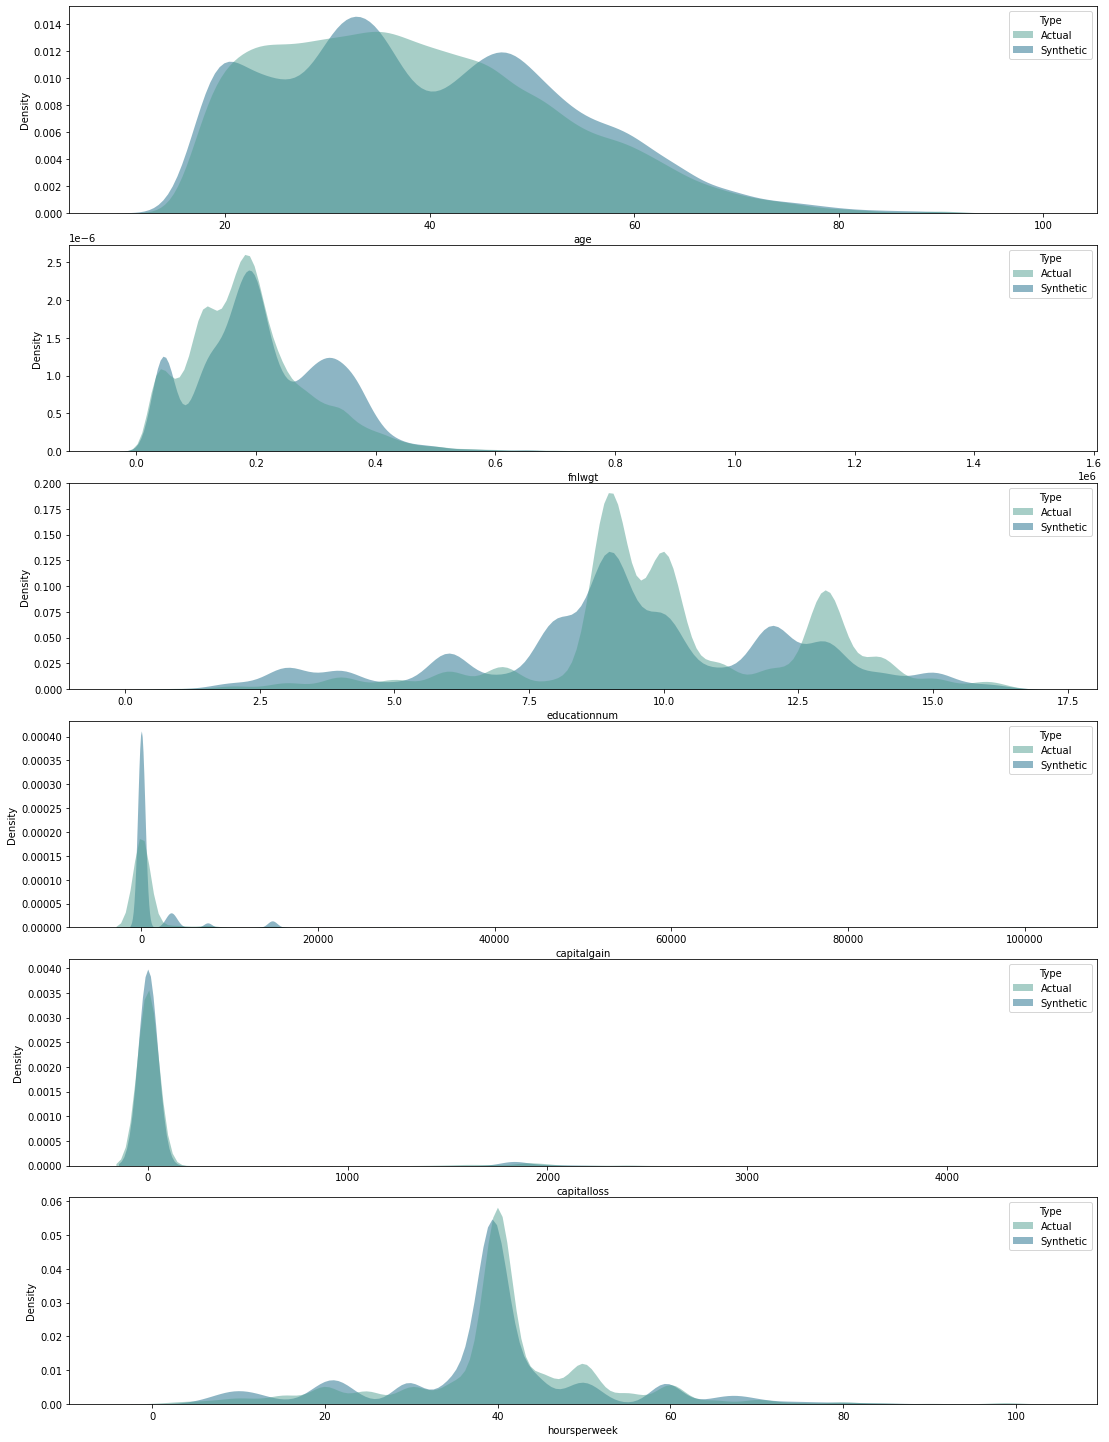

In [9]:
#plotting the distributions of actuals vs synthetic data
x_plot = x_train.copy()
x_plot['Type'] = 'Actual'
synthetic_data = ctgan_model.sample(len(x_train))
synthetic_data['Type'] = 'Synthetic'

nrow = 6
ncol = 1
c = 0
fig, axs = plt.subplots(nrow, ncol,figsize=(15,20))
fig.tight_layout()
for i, ax in enumerate(fig.axes):
    df_x = x_plot[[continuous[c],'Type']]
    df_y = synthetic_data[[continuous[c],'Type']]
    df_t = df_x.append(df_y)
    sns.kdeplot(data=df_t, ax=ax, x=continuous[c], hue="Type",fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=0)
    print(continuous[c])
    c+=1

In [10]:
#setting up a function so we can consistently prepare data downstream
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
enc = OneHotEncoder(handle_unknown='ignore')
le = LabelEncoder()
imp.fit(x_train[continuous])
enc.fit(x_train[categorical])
le.fit(x_train['target'])
def prepare_data(df_in,imp,enc,le):
    x_cont = df_in[continuous]
    x = imp.transform(x_cont)
    x_cat = df_in[categorical]
    x_cat = enc.transform(x_cat)
    x = np.concatenate((x,x_cat.toarray()),axis=1)
    y = le.transform(df_in['target'])
    return x,y

In [11]:
#prepare our actuals for training
x = prepare_data(x_train,imp,enc,le)
x_train_,x_test,y_train,y_test = train_test_split(x[0],x[1])

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
#how well does our classifier do on test?
clf = GradientBoostingClassifier().fit(x_train_, y_train)
clf.score(x_test, y_test)

0.8663390663390663

In [14]:
#test it on validation data
x_valid = prepare_data(x_valid,imp,enc,le)
clf.score(x_valid[0],x_valid[1])

0.8673381648446137

In [15]:
#generate an equivalent amount of synthetic data
s_d = ctgan_model.sample(len(x_train))

In [16]:
s_d

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,target
0,75,State-gov,31815,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,14793,0,65,England,>50K
1,28,Private,181997,Assoc-acdm,9,Never-married,Sales,Own-child,White,Male,20,0,24,United-States,<=50K
2,56,Private,187262,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,-9,1,23,United-States,<=50K
3,51,Federal-gov,124968,Some-college,10,Divorced,Exec-managerial,Unmarried,Black,Female,-13,0,35,United-States,<=50K
4,24,Private,73614,Some-college,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-8,0,68,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,31,Local-gov,279824,Prof-school,14,Never-married,Prof-specialty,Not-in-family,White,Female,19,0,39,United-States,<=50K
24416,26,Private,384953,HS-grad,9,Never-married,Priv-house-serv,Not-in-family,White,Female,-31,0,39,Jamaica,<=50K
24417,18,Private,325166,5th-6th,6,Never-married,Other-service,Own-child,White,Female,-13,0,36,United-States,<=50K
24418,51,Private,271368,Bachelors,12,Married-civ-spouse,Exec-managerial,Husband,White,Male,3895,0,11,Germany,>50K


In [17]:
#fit a classifier on synthetic data
x = prepare_data(s_d,imp,enc,le)
clf.fit(x[0],x[1])

GradientBoostingClassifier()

In [18]:
#test it on validation data
clf.score(x_valid[0],x_valid[1])

0.8333128608279081

In [19]:
#how to save the ctgan synthetic model
ctgan_model.save('ctgan.model')

In [ ]:
copula_model = GaussianCopula()
copula_model.fit(x_train)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4965: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2429: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/copulas/univariate/truncated_gaussian.py:43: RuntimeWarning: invalid value encountered in double_scalars
  a = (self.min - loc) / scale
/usr/local/lib/python3.6/dist-packages/copulas/univariate/truncated_ga

In [ ]:
#fit a classifier on synthetic data
x = prepare_data(copula_model.sample(len(x_train)),imp,enc,le)
clf.fit(x[0],x[1])
#test it on validation data
clf.score(x_valid[0],x_valid[1])

In [ ]:
copulaGAN_model = CopulaGAN()
copulaGAN_model.fit(x_train)

In [ ]:
#fit a classifier on synthetic data
x = prepare_data(copulaGAN_model.sample(len(x_train)),imp,enc,le)
clf.fit(x[0],x[1])
#test it on validation data
clf.score(x_valid[0],x_valid[1])

In [ ]:
tvae_model = TVAE()
tvae_model.fit(x_train)
#fit a classifier on synthetic data
x = prepare_data(tvae_model.sample(len(x_train)),imp,enc,le)
clf.fit(x[0],x[1])
#test it on validation data
clf.score(x_valid[0],x_valid[1])

In [ ]:
tvae_model.save("tvae.model")
copulaGAN_model.save("copulaGAN.model")
copula_model.save("copula.model")